This short notebook describes the network problem described in the [price of anarchy reading](http://montoya.econ.ubc.ca/Econ306/price_of_anarchy.pdf).

Recall there are two routers, packets in the first router get through for sure while packets in the second router a processes with probability $\beta < 1$.  If two packets arrive at the same router each gets through with proabability $\frac{1}{2}$.

This supports the following matrix game:
<table>
    <tr><td>$\frac{1}{2}$,$\frac{1}{2}$</td><td>1,$\beta$</td></tr>
    <tr><td>$\beta$,1 </td><td> $\frac{\beta}{2}$, $\frac{\beta}{2}$ </td></tr></table>

This game is perfectly symmetric.  So we only need to find one mixing probability, we'll call it $\pi$, with which each of the two computers sends its packet to the efficient router.  This is just a mixed strategy equilibrium.  So solve
$$\frac{\pi}{2}+(1-\pi) = \pi\beta+(1-\pi)\frac{\beta}{2}$$


In [9]:
var('beta','pi')
sol2 = solve(pi/2+(1-pi) == pi*beta+(1-pi)*beta/2,pi)
show (sol2[0])

pi == -(beta - 2)/(beta + 1)

We want to do a little more with this problem - in particular, figure out how the expected number of packets that get through varies with the probability computers use to send their packets to the efficient router.  If both use the probability $\beta$, then the expected number of packets that get through is given by the expression
$$\pi^2  +2(1-\pi)\pi(1+\beta)+(1-\pi)^2 \beta$$ 

In [10]:
exp = pi^2+2*(1-pi)*pi*(1+beta)+(1-pi)^2*beta
show(latex(exp))

\beta {\left(\pi - 1\right)}^{2} - 2 \, {\left(\beta + 1\right)} {\left(\pi - 1\right)} \pi + \pi^{2}

Now lets substitute a value for $\beta$ so we can do some plotting.

In [11]:
ess = exp.substitute(beta=4/5)
show(latex(ess))

\frac{4}{5} \, {\left(\pi - 1\right)}^{2} - \frac{18}{5} \, {\left(\pi - 1\right)} \pi + \pi^{2}

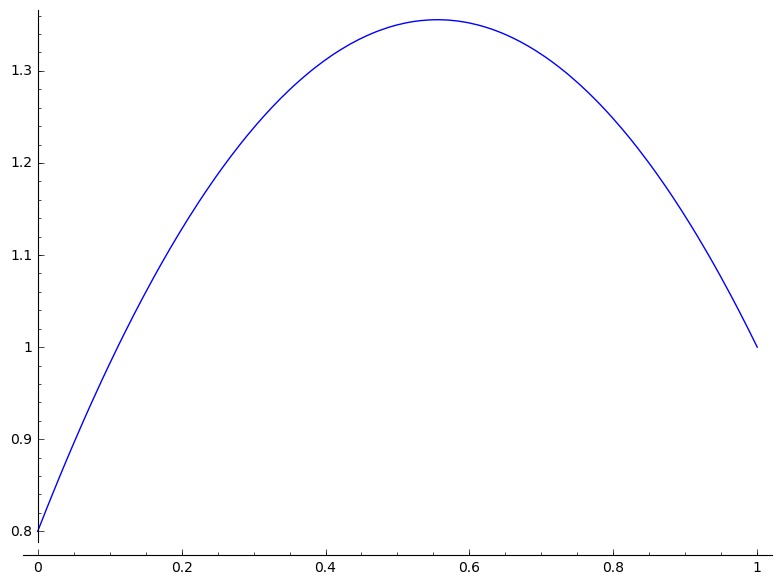

In [12]:
plot(ess,(pi,0,1))

It seems that if we want to get the maximal number of packets through the network, then there is a very specific value of $\pi$ that we want, the one where the function above is maximized.

In [13]:
d = diff(ess,pi)
show(latex(d))
show(latex(solve(d == 0,pi)))

-\frac{18}{5} \, \pi + 2

\left[\pi = \left(\frac{5}{9}\right)\right]

Recall that in the Nash equilibrium for this problem, the equilibrium value of $\pi$ is given by 
$$\frac{2-\beta}{1+\beta}$$
which, in the case where $\beta = \frac{4}{5}$ gives $\pi=\frac{2}{3}$
so that computers use the efficient router more frequently than a network planner would want them to.

The best value for $\pi$ from the regulators standpoint depends on $\beta$.  It is easy enough to figure out how, well just do the same exercise we just did. Except will use the function `exp`  instead of the function `ess`.

In [16]:
e = diff(exp,pi)
show(latex(e))
show(latex(solve(e==0,pi)))

-2 \, {\left(\beta + 1\right)} {\left(\pi - 1\right)} + 2 \, \beta {\left(\pi - 1\right)} - 2 \, {\left(\beta + 1\right)} \pi + 2 \, \pi

\left[\pi = \frac{1}{\beta + 1}\right]

Notice one very odd thing about this.  Recall if $\beta$  is smaller than $\frac{1}{2}$, then the inefficient router is dominated, so it will never be used in a Nash equilibrium.  The formula above says that the regulator would want the websites to use the inefficient router with positive probability even if $\beta$ was very small.

Finally, we can do the price of anarchy exercise.  Lets define two function, the first we'll just call `regulated` to indicate that the regulator chooses the mixing probability.  We'll get it by substituting the regulators mixing probablity that we just calculated into `exp`.  The we'll define `anarchy` by substituting the Nash equilibrium mixing probability into `exp`.  